In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# %matplotlib inline

In [2]:
df = pd.read_csv("D:\Sentiment Analysis\Code\Cleaned_tweets.csv")
df.head()

,Unnamed: 0,Tweets,Analysis
0,0,Native of East Hull . Former : police research...,Neutral
1,1,on colonial & - the which formed part of the -...,Neutral
2,2,The Interesting With Colour & Style,Positive
3,3,Next is the daily from Daily group . With a mi...,Neutral
4,4,This is the official handle of the State Covid...,Neutral


In [3]:
df = df.iloc[:,1:]
df.head()

,Tweets,Analysis
0,Native of East Hull . Former : police research...,Neutral
1,on colonial & - the which formed part of the -...,Neutral
2,The Interesting With Colour & Style,Positive
3,Next is the daily from Daily group . With a mi...,Neutral
4,This is the official handle of the State Covid...,Neutral


In [4]:
len(df)

4956

In [5]:
df.isnull().sum()

Tweets      24
Analysis     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Tweets      0
Analysis    0
dtype: int64

In [8]:
df['Tweets'] = df['Tweets'].str.lower()
df['Tweets'].head()

0    native of east hull . former : police research...
1    on colonial & - the which formed part of the -...
2                  the interesting with colour & style
3    next is the daily from daily group . with a mi...
4    this is the official handle of the state covid...
Name: Tweets, dtype: object

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Tweets'] = df['Tweets'].apply(lambda text: cleaning_stopwords(text))
df['Tweets'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    native east hull . former : police researcher ...
1    colonial & - formed part - post & independence...
2                           interesting colour & style
3    next daily daily group . micro - focus & , nex...
4    official handle state covid19 emergency operat...
Name: Tweets, dtype: object

In [10]:
df['Tweets'].tail()

4951    green - eyed 🇯🇲 🇮🇪 mulatto l . . 😎 leftist . p...
4952    • efficiency ⚡️ strategy • 📋 ~ 2008 • r & • r ...
4953    passionate : body - mind health , food medicin...
4954    ' super important , ' definitely want read eve...
4955                                                 news
Name: Tweets, dtype: object

In [11]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
df['Tweets'] = df['Tweets'].apply(lambda x: remove_emojis(x))
df['Tweets'].tail()

4951    green - eyed   mulatto l . .  leftist . progre...
4952    • efficiency  strategy •  ~ 2008 • r & • r ~ 2...
4953    passionate : body - mind health , food medicin...
4954    ' super important , ' definitely want read eve...
4955                                                 news
Name: Tweets, dtype: object

In [12]:
import re
def nospecial(text):
    text = re.sub("[^a-zA-Z]+", " ",text)
    return text

df['Tweets'] = df['Tweets'].apply(lambda x: nospecial(x))

In [13]:
df['Tweets'].tail()

4951    green eyed mulatto l leftist progressive indep...
4952     efficiency strategy r r event advice born ppm...
4953    passionate body mind health food medicine poli...
4954     super important definitely want read everythi...
4955                                                 news
Name: Tweets, dtype: object

In [14]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Tweets']= df['Tweets'].apply(lambda x: cleaning_punctuations(x))
df['Tweets'].head()

0    native east hull former police researcher fina...
1    colonial formed part post independence chronol...
2                             interesting colour style
3    next daily daily group micro focus next incisi...
4     official handle state covid emergency operation 
Name: Tweets, dtype: object

In [15]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_repeating_char(x))
df['Tweets'].head()

0    native east hull former police researcher fina...
1    colonial formed part post independence chronol...
2                             interesting colour style
3    next daily daily group micro focus next incisi...
4     official handle state covid emergency operation 
Name: Tweets, dtype: object

In [16]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_URLs(x))
df['Tweets'].head()

0    native east hull former police researcher fina...
1    colonial formed part post independence chronol...
2                             interesting colour style
3    next daily daily group micro focus next incisi...
4     official handle state covid emergency operation 
Name: Tweets, dtype: object

In [17]:
df['Tweets'].tail()

4951    green eyed mulatto l leftist progressive indep...
4952     efficiency strategy r r event advice born ppm...
4953    passionate body mind health food medicine poli...
4954     super important definitely want read everythi...
4955                                                 news
Name: Tweets, dtype: object

In [18]:
tokenized_tweet = df['Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [native, east, hull, former, police, researche...
1    [colonial, formed, part, post, independence, c...
2                         [interesting, colour, style]
3    [next, daily, daily, group, micro, focus, next...
4    [official, handle, state, covid, emergency, op...
Name: Tweets, dtype: object

In [19]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [native, east, hull, former, police, researche...
1    [colonial, formed, part, post, independence, c...
2                         [interesting, colour, style]
3    [next, daily, daily, group, micro, focus, next...
4    [official, handle, state, covid, emergency, op...
Name: Tweets, dtype: object

In [20]:
data_pos = df[df['Analysis'] == 'Positive']
data_neg = df[df['Analysis'] == 'Negative']
data_nut = df[df['Analysis'] == 'Neutral']

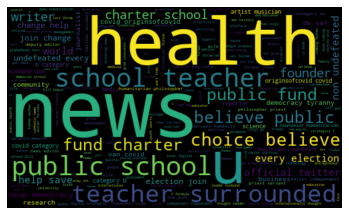

In [21]:
from wordcloud import WordCloud

allWords_neutral = ' '.join(twts for twts in data_nut['Tweets'])
wordCloud_neutral = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords_neutral)
plt.imshow(wordCloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.show()

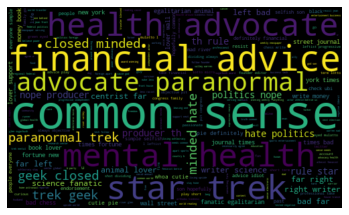

In [22]:
allWords_neg = ' '.join(twts for twts in data_neg['Tweets'])
wordCloud_neg = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords_neg)
plt.imshow(wordCloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

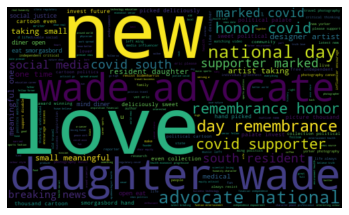

In [23]:
allWords_pos = ' '.join(twts for twts in data_pos['Tweets'])
wordCloud_pos = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords_pos)
plt.imshow(wordCloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
final_vectorized_data=vectoriser.fit_transform(df['Tweets'])
final_vectorized_data

<4932x20934 sparse matrix of type '<class 'numpy.float64'>'
	with 73108 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['Analysis'],
                                                    test_size=0.2, random_state=69)

In [27]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (3945, 20934)
X_test_shape :  (987, 20934)
y_train_shape :  (3945,)
y_test_shape :  (987,)


In [29]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 

In [31]:
predicted_naive = model_naive.predict(X_test)

In [32]:
from sklearn import metrics
print("Confusion Metrics\n",metrics.confusion_matrix(y_test,predicted_naive), end="\n\n\n")

print("Classification Report\n",metrics.classification_report(y_test,predicted_naive), end="\n\n\n")

print("Accuracy Score:", metrics.accuracy_score(y_test,predicted_naive))

Confusion Metrics
 [[ 36  43  38]
 [  0 388  65]
 [  0  62 355]]


Classification Report
               precision    recall  f1-score   support

    Negative       1.00      0.31      0.47       117
     Neutral       0.79      0.86      0.82       453
    Positive       0.78      0.85      0.81       417

    accuracy                           0.79       987
   macro avg       0.85      0.67      0.70       987
weighted avg       0.81      0.79      0.78       987



Accuracy Score: 0.7892603850050659


In [34]:
from sklearn.neighbors import KNeighborsClassifier
Knn_clf = KNeighborsClassifier()

Knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
KNN_predictions = Knn_clf.predict(X_test)

In [37]:
print("Confusion Metrics\n",metrics.confusion_matrix(y_test,KNN_predictions), end="\n\n\n")

print("Classification Report\n",metrics.classification_report(y_test,KNN_predictions), end="\n\n\n")

print("Accuracy Score:", metrics.accuracy_score(y_test,KNN_predictions))

Confusion Metrics
 [[ 34  83   0]
 [  0 453   0]
 [  0 258 159]]


Classification Report
               precision    recall  f1-score   support

    Negative       1.00      0.29      0.45       117
     Neutral       0.57      1.00      0.73       453
    Positive       1.00      0.38      0.55       417

    accuracy                           0.65       987
   macro avg       0.86      0.56      0.58       987
weighted avg       0.80      0.65      0.62       987



Accuracy Score: 0.6545086119554204
